In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
import matplotlib.pyplot as plt
import random
import math
import matplotlib
matplotlib.style.use('ggplot')

import os
os.chdir("C:/Users/olesh/Documents/programs/transopt_routing/NIER")
import json



%matplotlib inline


In [92]:
os.environ['NUMEXPR_NUM_THREADS'] = '24'

In [88]:
df = pd.read_excel('Bug.xlsx')
df

,address,count,v,freq,volume
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,1.0,3.00
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,1.0,3.00
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,1.0,5.50
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,1.0,2.25
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,1.0,2.25
...,...,...,...,...,...
2143,ЯРОСЛАВСКАЯ 118,3.0,0.75,1.0,2.25
2144,ЯРОСЛАВСКАЯ 30,2.0,0.75,1.0,1.50
2145,ЯРОСЛАВСКАЯ 4,2.0,0.75,1.0,1.50
2146,ЯРОСЛАВСКАЯ 68,2.0,0.75,1.0,1.50


In [ ]:
lat = np.zeros(len(df))
lon = np.zeros(len(df))

In [165]:
df['lat'] = lat
df['lon'] = lon
df

,address,count,v,freq,volume,lat,lon
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,1.0,3.00,45.054699,38.999636
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,1.0,3.00,45.054026,38.991491
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,1.0,5.50,45.011292,39.029004
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,1.0,2.25,45.014636,39.000797
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,1.0,2.25,45.014292,39.003210
...,...,...,...,...,...,...,...
2143,ЯРОСЛАВСКАЯ 118,3.0,0.75,1.0,2.25,45.087812,38.985663
2144,ЯРОСЛАВСКАЯ 30,2.0,0.75,1.0,1.50,45.079395,38.983767
2145,ЯРОСЛАВСКАЯ 4,2.0,0.75,1.0,1.50,0.000000,0.000000
2146,ЯРОСЛАВСКАЯ 68,2.0,0.75,1.0,1.50,45.083335,38.984642


In [244]:
df = df[df['lon'] >10]

In [ ]:
points = np.zeros((2, 2148))

In [164]:
i = -1
for row in df.iterrows():
    i += 1
    url= 'https://nominatim.openstreetmap.org/search?format=json&city=krasnodar&format=json&street='
    url += urllib.parse.quote(row[1]['address'])
    webUrl  = urllib.request.urlopen(url, timeout=100)
    data = webUrl.read()
    
    if i%50 == 0:
        print(i/len(df))
    
    for row2 in json.loads(data): 
        if row2['display_name'].find(', Краснодар,') > -1:
            lat[i] = row2['lat']
            lon[i] = row2['lon']
            break

0.0
0.023277467411545624
0.04655493482309125
0.06983240223463687
0.0931098696461825
0.11638733705772812
0.13966480446927373
0.16294227188081936
0.186219739292365
0.20949720670391062
0.23277467411545624
0.25605214152700184
0.27932960893854747
0.3026070763500931
0.3258845437616387
0.34916201117318435
0.37243947858473
0.3957169459962756
0.41899441340782123
0.44227188081936686
0.4655493482309125
0.4888268156424581
0.5121042830540037
0.5353817504655494
0.5586592178770949
0.5819366852886406
0.6052141527001862
0.6284916201117319
0.6517690875232774
0.6750465549348231
0.6983240223463687
0.7216014897579144
0.74487895716946
0.7681564245810056
0.7914338919925512
0.8147113594040968
0.8379888268156425
0.861266294227188
0.8845437616387337
0.9078212290502793
0.931098696461825
0.9543761638733705
0.9776536312849162


In [173]:
#g = df[['volume', 'x', 'y']]
df.drop(['address', 'count', 'v'], axis=1).to_csv('file_data3.csv', index = False, sep = ' ')

## urllib

In [84]:

import urllib
webUrl  = urllib.request.urlopen('https://nominatim.openstreetmap.org/search?format=json&city=krasnodar&format=json&street=krasnaya', timeout=100)
data = webUrl.read()


In [ ]:
https://nominatim.openstreetmap.org/search?format=json&city=krasnodar&format=json&street=krasnaya
    

In [179]:

url= 'https://nominatim.openstreetmap.org/search?format=json&city=krasnodar&format=json&street='
url += urllib.parse.quote("ЛЕВАНЕВСКОГО 71 А")


webUrl  = urllib.request.urlopen(url, timeout=100)
data = webUrl.read()
#print(data)

In [180]:
json.loads(data)[0]

{'place_id': 133033524,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 181474014,
 'boundingbox': ['45.0235867', '45.0266102', '38.9811167', '38.9821946'],
 'lat': '45.0251037',
 'lon': '38.9816526',
 'display_name': 'улица Леваневского, Центральный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350000, Россия',
 'class': 'highway',
 'type': 'tertiary',
 'importance': 0.09999999999999998}

In [22]:
from OSMPythonTools.overpass import Overpass
overpass = Overpass()
result = overpass.query('way["name"="Stephansdom"]; out body;')
result

## XML, read graphml

In [96]:
import xml.etree.ElementTree as ET
tree = ET.parse('krasnodar_graphml.graphml')
root = tree.getroot()

In [231]:
objects = np.zeros((len(root), 3))
objects

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [232]:
i = 0
for child in root:
    objects[i][0] =  child[0].text
    objects[i][1] =  child[1].text
    objects[i][2] =  child.attrib['id']

    i += 1
    #print(child.attrib['id'])
    #print('lat', child[0].text)
    #print("lon", child[1].text)
        
#>>> for child in root:
#...     print(child.tag, child.attrib)

In [235]:
objects = objects[np.argsort(objects[:, 0])]

# objects[objects[:, 1].argsort()]
# sort by column

In [237]:
objects

array([[4.49691715e+01, 3.90221521e+01, 2.26828671e+09],
       [4.49692383e+01, 3.90226379e+01, 2.26828671e+09],
       [4.49692545e+01, 3.90225556e+01, 2.26828674e+09],
       ...,
       [4.51278176e+01, 3.89972184e+01, 4.98413716e+08],
       [4.51278756e+01, 3.89978584e+01, 2.50895155e+09],
       [4.51278817e+01, 3.89979532e+01, 4.54642376e+08]])

In [247]:
#objects = objects.T
objects_df = pd.DataFrame(objects)
objects_df

,0,1,2
0,44.969172,39.022152,2.268287e+09
1,44.969238,39.022638,2.268287e+09
2,44.969254,39.022556,2.268287e+09
3,44.969336,39.022987,2.268287e+09
4,44.969416,39.024007,2.268287e+09
...,...,...,...
41580,45.127638,38.998130,1.860020e+09
41581,45.127787,38.998098,9.449823e+08
41582,45.127818,38.997218,4.984137e+08
41583,45.127876,38.997858,2.508952e+09


## json, matching

In [188]:

data = {}
data['people'] = []
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
data['people'].append({
    'name': 'Tim',
    'website': 'apple.com',
    'from': 'Alabama'
})

with open('data.json', 'w') as outfile:
    json.dump(data, outfile)

In [261]:
with open('matching_to_graph.json') as json_file:
    matching_data = json.load(json_file)
matching_data[ '1000182980']

68696

In [250]:
matching_data[str(int(objects_df.iloc[56][2]))]

60038

In [266]:
df

,address,count,v,freq,volume,lat,lon
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,1.0,3.00,45.054699,38.999636
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,1.0,3.00,45.054026,38.991491
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,1.0,5.50,45.011292,39.029004
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,1.0,2.25,45.014636,39.000797
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,1.0,2.25,45.014292,39.003210
...,...,...,...,...,...,...,...
2142,ЯНА ПОЛУЯНА 42,6.0,0.75,2.0,4.50,45.063076,38.956235
2143,ЯРОСЛАВСКАЯ 118,3.0,0.75,1.0,2.25,45.087812,38.985663
2144,ЯРОСЛАВСКАЯ 30,2.0,0.75,1.0,1.50,45.079395,38.983767
2146,ЯРОСЛАВСКАЯ 68,2.0,0.75,1.0,1.50,45.083335,38.984642


In [275]:
row = df.iloc[5]
print(row)
lat = row['lat']
lon = row['lon']
objects_df[abs(objects_df[0] - lat) < 0.0005][abs(objects_df[1] - lon) < 0.0005]

address    АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 173
count                              2
v                               0.75
freq                               1
volume                           1.5
lat                          45.0138
lon                          39.0051
Name: 5, dtype: object


<ipython-input-275-afc3fad8196b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  objects_df[abs(objects_df[0] - lat) < 0.0005][abs(objects_df[1] - lon) < 0.0005]


,0,1,2
4359,45.013441,39.005243,2.961733e+08
4419,45.013536,39.005398,3.767317e+09


In [323]:
i = 0
for j in range(len(df)):
    lat = df.iloc[j]['lat']
    lon = df.iloc[j]['lon']
    l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])
    i += 1
    if l == 0:
        print(row[1])
        break
        df.at[j, 'lat'] = 0
        df.at[j, 'lon'] = 0
print('i= ', i)

address    КУБАНСКАЯ 48
count                 4
v                  0.75
freq                  1
volume                3
lat             45.1354
lon             39.0347
Name: 181, dtype: object
i=  4


<ipython-input-323-220ce29cfeab>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])
<ipython-input-323-220ce29cfeab>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])
<ipython-input-323-220ce29cfeab>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])
<ipython-input-323-220ce29cfeab>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])


In [368]:
df = pd.read_csv('file_data2.csv', sep = ';')

In [369]:
for j in range(len(df)):
    if df.iloc[j]['freq'] == 1:
        df.at[j, 'freq'] = 7
    elif df.iloc[j]['freq'] == 2:
        df.at[j, 'freq'] = 4
    elif df.iloc[j]['freq'] == 3:
        df.at[j, 'freq'] = 3
    elif df.iloc[j]['freq'] == 4:
        df.at[j, 'freq'] = 2
        

In [370]:
df

,address,count,v,freq,volume,lat,lon
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,7.0,3.00,45.054699,38.999636
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,7.0,3.00,45.054026,38.991491
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,7.0,5.50,45.011292,39.029004
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,7.0,2.25,45.014636,39.000797
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,7.0,2.25,45.014292,39.003210
...,...,...,...,...,...,...,...
1471,ЯНА ПОЛУЯНА 42,6.0,0.75,4.0,4.50,45.063076,38.956235
1472,ЯРОСЛАВСКАЯ 118,3.0,0.75,7.0,2.25,45.087812,38.985663
1473,ЯРОСЛАВСКАЯ 30,2.0,0.75,7.0,1.50,45.079395,38.983767
1474,ЯРОСЛАВСКАЯ 68,2.0,0.75,7.0,1.50,45.083335,38.984642


In [ ]:
described = df.describe()

In [372]:
df['lat'] = (df['lat'] - described['lat']['min'] - l/2) * 1000

In [373]:
df['lon'] = (df['lon'] - described['lon']['min'] - l/2) * 1000

In [344]:
described = df[['lat', 'lon']].describe()

In [359]:
l1 = described['lat']['max'] - described['lat']['min']

In [360]:
l2 = described['lon']['max'] - described['lon']['min']

In [374]:
df

,address,count,v,freq,volume,lat,lon
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,7.0,3.00,-13.00745,70.079492
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,7.0,3.00,-13.67995,61.934726
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,7.0,5.50,-56.41430,99.447592
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,7.0,2.25,-53.06995,71.240202
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,7.0,2.25,-53.41440,73.653192
...,...,...,...,...,...,...,...
1471,ЯНА ПОЛУЯНА 42,6.0,0.75,4.0,4.50,-4.63010,26.678763
1472,ЯРОСЛАВСКАЯ 118,3.0,0.75,7.0,2.25,20.10590,56.106269
1473,ЯРОСЛАВСКАЯ 30,2.0,0.75,7.0,1.50,11.68905,54.210606
1474,ЯРОСЛАВСКАЯ 68,2.0,0.75,7.0,1.50,15.62890,55.085464


In [375]:
df.drop(['address', 'count', 'v'], axis=1).to_csv('cpp_data.csv', index = False, sep = ' ')

## TEST

In [34]:
df = pd.read_csv('data_vertex.csv', sep = ' ')
df

,freq,volume,lat,lon
0,0.0,0.00,-19.865318,75.939868
1,7.0,3.00,-13.007450,70.079492
2,7.0,3.00,-13.679950,61.934726
3,7.0,5.50,-56.414300,99.447592
4,7.0,2.25,-53.069950,71.240202
...,...,...,...,...
1472,4.0,4.50,-4.630100,26.678763
1473,7.0,2.25,20.105900,56.106269
1474,7.0,1.50,11.689050,54.210606
1475,7.0,1.50,15.628900,55.085464


In [35]:
df.describe()

,freq,volume,lat,lon
count,1477.000000,1477.000000,1477.000000,1477.000000
mean,6.223426,2.854140,-19.865318,75.939868
std,1.347554,1.600816,32.264919,53.819607
min,0.000000,0.000000,-78.130100,-78.130100
25%,4.000000,1.500000,-43.129700,36.820844
50%,7.000000,2.250000,-28.140950,66.380142
75%,7.000000,3.300000,-6.111350,104.437819
max,7.000000,12.750000,78.130100,199.386192


In [36]:
X = df['lat']
Y = df['lon']

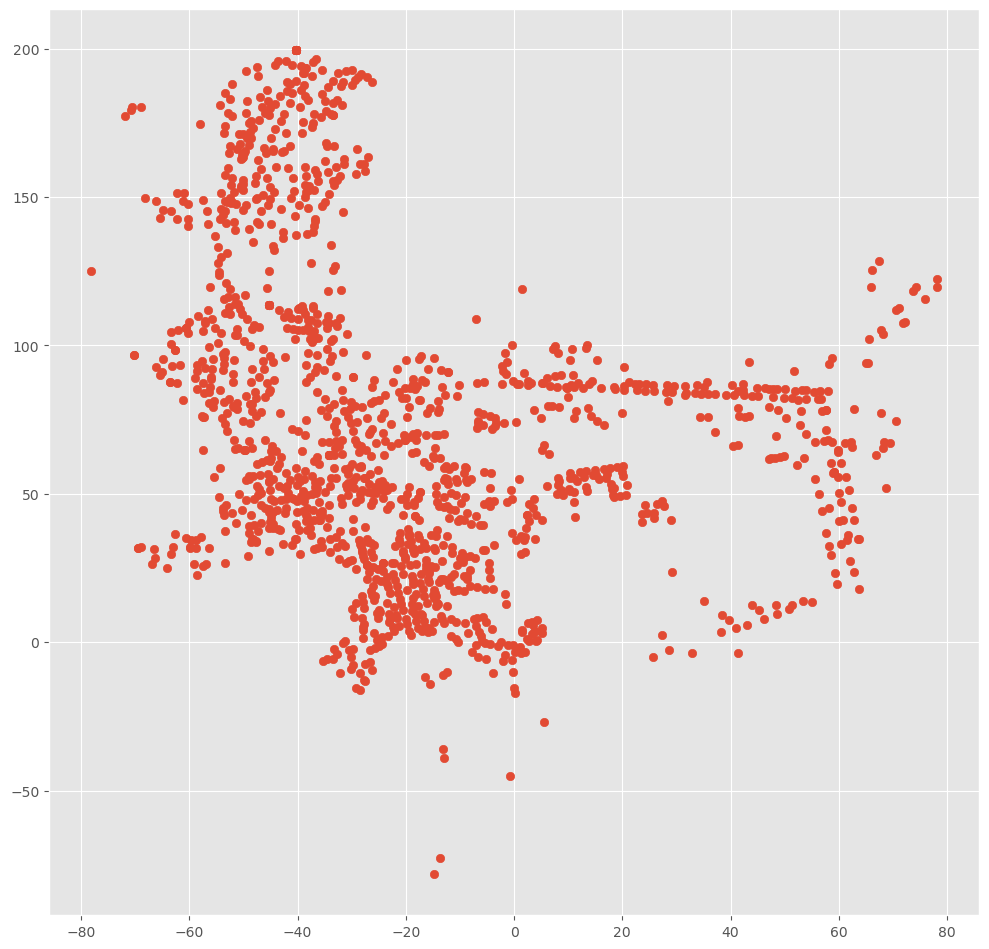

In [37]:
fig = plt.figure(figsize=(12,12), dpi=100)

scatter(X,Y)

In [5]:
def get_routs(routs_index):
    routs = []
    for rout in routs_index:
        rout_X = []
        rout_Y = []
        for vertex in rout:
            rout_X.append(X[vertex])
            rout_Y.append(Y[vertex])
        routs.append([rout_X, rout_Y])
    return routs

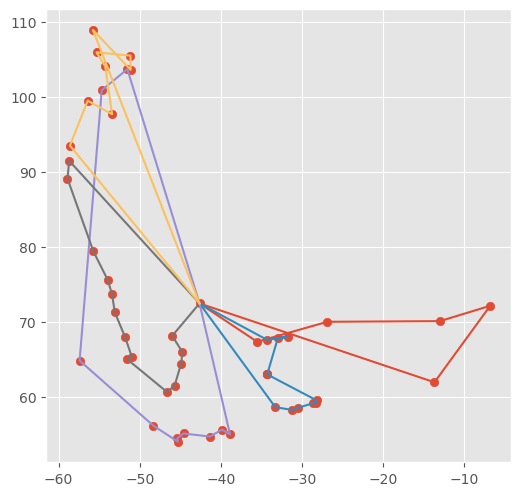

In [14]:
routs_index = [[0, 27, 31, 1, 47, 2, 0,0],
[0, 28, 30, 29, 40, 39, 41, 42, 25, 20, 19, 17, 16, 18, 0,0],
[0, 24, 23, 22, 21, 15, 26, 36, 48, 14, 11, 0,0],
[0, 49, 50, 37, 38, 35, 8, 9, 10, 4, 5, 6, 7, 32, 33, 0,0],
[0, 34, 3, 43, 44, 46, 13, 12, 45, 0,0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 2424.16

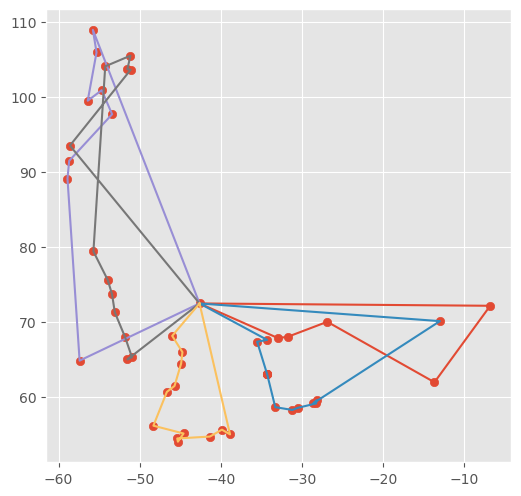

In [15]:
routs_index = [[0, 29, 30, 31, 2, 47, 0, 0],
[0, 28, 27, 41, 39, 40, 42, 18, 16, 17, 20, 25, 19, 1, 0, 0],
[0, 48, 32, 33, 43, 14, 3, 46, 45, 0, 0],
[0, 8, 9, 10, 4, 5, 6, 7, 44, 13, 11, 12, 34, 0, 0],
[0, 49, 50, 37, 38, 35, 36, 21, 26, 15, 22, 23, 24, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 2422.59

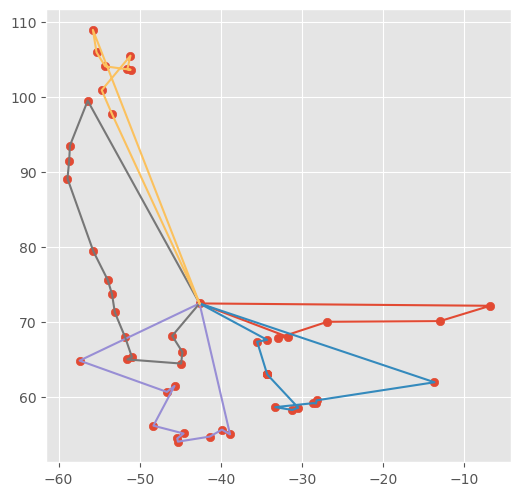

In [18]:
routs_index = [[0, 30, 29, 31, 1, 47, 0, 0],
[0, 28, 27, 39, 40, 41, 42, 17, 16, 18, 19, 20, 25, 2, 0, 0],
[0, 24, 23, 22, 26, 15, 21, 36, 38, 35, 48, 0, 0],
[0, 49, 50, 37, 8, 9, 10, 4, 5, 6, 7, 32, 33, 34, 3, 0, 0],
[0, 45, 46, 44, 12, 11, 13, 14, 43, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 955.544
# 30 sec

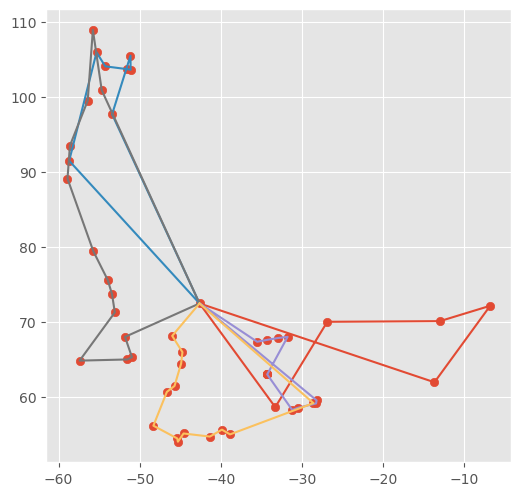

In [19]:
routs_index = [[0, 2, 47, 1, 31, 18, 0, 0],
[0, 43, 13, 12, 11, 44, 46, 33, 0, 0],
[0, 27, 28, 29, 30, 42, 39, 40, 41, 16, 17, 20, 25, 0, 0],
[0, 10, 9, 8, 48, 4, 5, 6, 7, 32, 34, 3, 45, 14, 0, 0],
[0, 49, 50, 37, 38, 35, 36, 15, 26, 21, 22, 23, 24, 19, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 942.758
# 30 sec

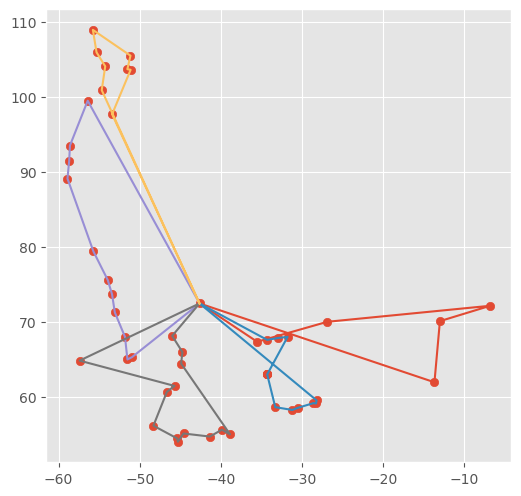

In [20]:
routs_index = [[0, 27, 31, 47, 1, 2, 0, 0],
[0, 28, 29, 30, 42, 41, 39, 40, 18, 16, 17, 19, 20, 25, 0, 0],
[0, 9, 8, 10, 4, 5, 6, 7, 32, 33, 34, 3, 0, 0],
[0, 49, 50, 37, 24, 23, 22, 21, 26, 15, 36, 35, 38, 48, 0, 0],
[0, 43, 12, 11, 13, 45, 46, 44, 14, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 911.274
# 30 sec

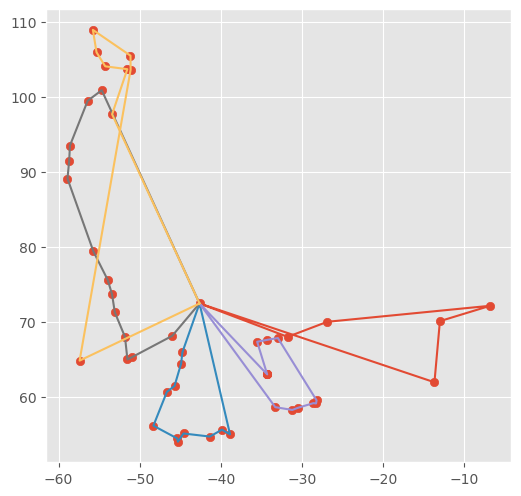

In [6]:
#ANT

routs_index = [[0, 30, 31, 47, 1, 2, 0, 0],
[0, 50, 37, 38, 35, 36, 15, 26, 21, 22, 23, 24, 0, 0],
[0, 18, 16, 17, 19, 20, 25, 29, 28, 27, 39, 40, 41, 42, 0, 0],
[0, 49, 9, 8, 10, 4, 5, 6, 7, 32, 33, 34, 3, 14, 0, 0],
[0, 48, 12, 13, 45, 46, 44, 11, 43, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 936.201
# 30 sec

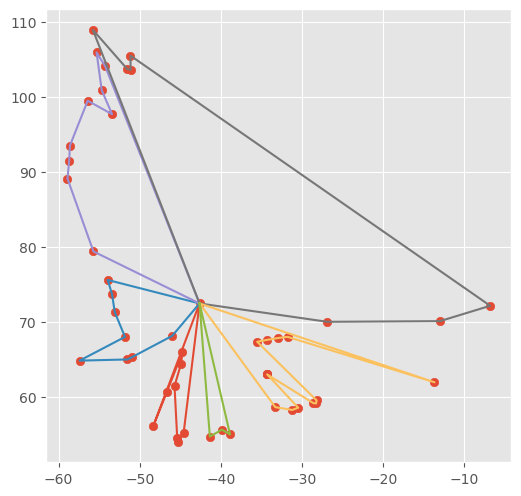

In [7]:
#SWEEP

routs_index = [[0, 21, 26, 15, 38, 37, 50, 35, 36, 0, 0],
[0, 49, 9, 8, 48, 10, 4, 5, 6, 0, 0],
[0, 7, 32, 33, 34, 3, 43, 14, 46, 44, 0, 0],
[0, 45, 11, 12, 13, 47, 1, 31, 0, 0],
[0, 2, 30, 29, 28, 27, 25, 20, 19, 39, 40, 41, 42, 17, 16, 18, 0, 0],
[0, 24, 23, 22, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 936.201
# 30 sec

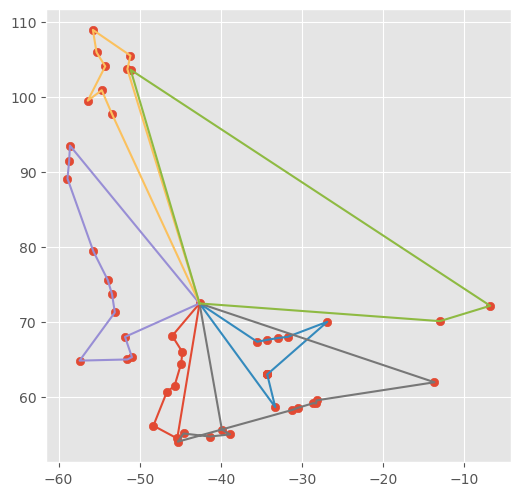

In [6]:
#greedy_test

routs_index = [[0, 49, 50, 37, 38, 35, 36, 15, 0, 0],
[0, 27, 28, 29, 30, 31, 39, 40, 41, 42, 18, 0, 0],
[0, 10, 9, 8, 48, 4, 5, 6, 7, 32, 33, 34, 0, 0],
[0, 23, 24, 22, 21, 26, 16, 17, 19, 20, 25, 2, 0, 0],
[0, 43, 14, 3, 44, 46, 45, 13, 11, 0, 0],
[0, 1, 47, 12, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 1216.78

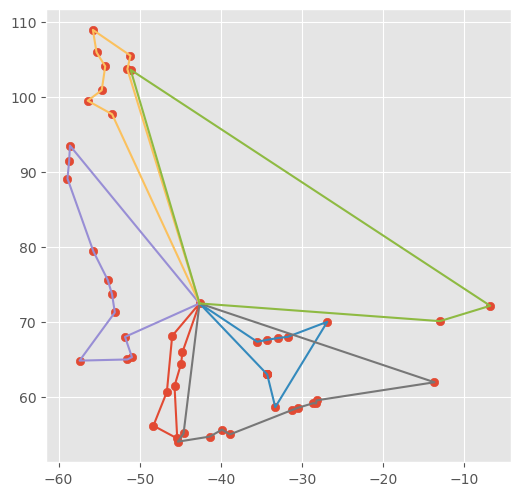

In [7]:
#greedy_test + 23opt

routs_index = [[0, 49, 35, 36, 15, 38, 37, 50, 0, 0],
[0, 0, 27, 28, 29, 30, 31, 18, 42, 41, 40, 39, 0],
[0, 10, 9, 8, 48, 4, 5, 6, 7, 32, 33, 34, 0, 0],
[0, 2, 25, 20, 19, 17, 16, 24, 23, 22, 26, 21, 0, 0],
[0, 0, 43, 3, 14, 44, 46, 45, 13, 11, 0],
[0, 1, 47, 12, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 1150.6

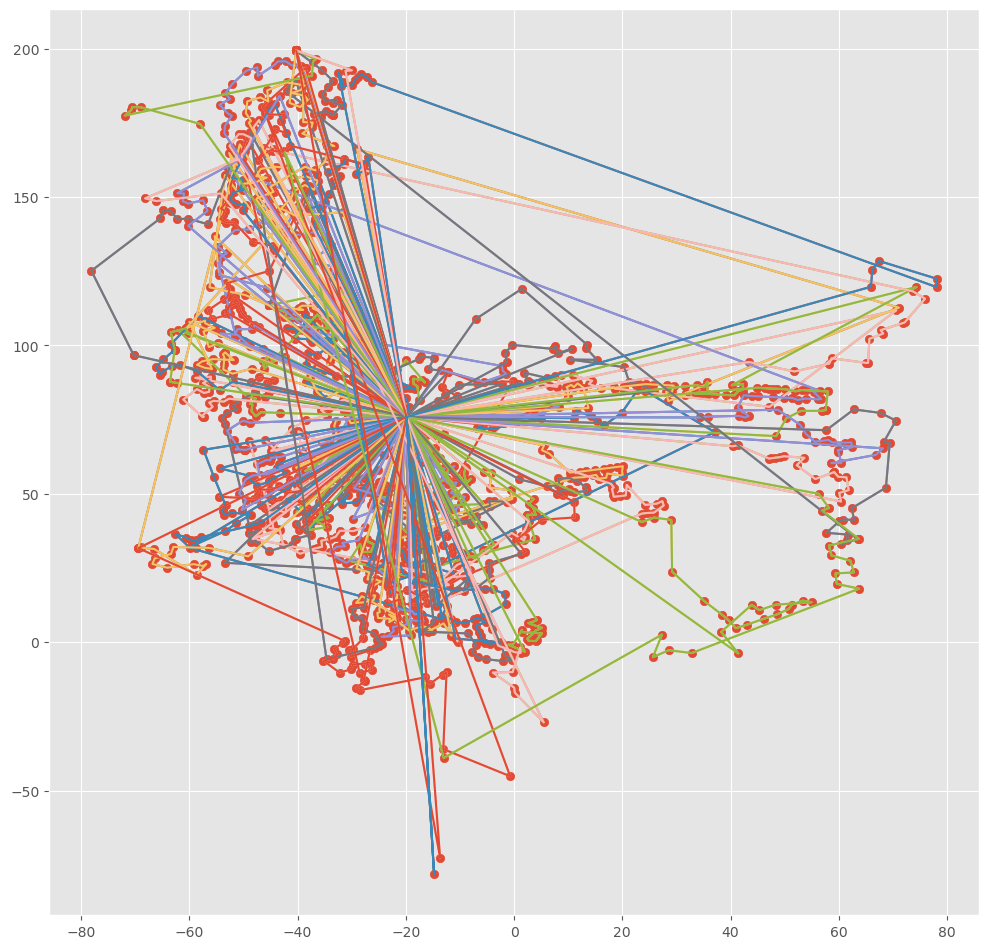

In [39]:
#greedy_test + 23opt

routs_index = [[0, 1463, 797, 1250, 1265, 1095, 1144, 1145, 652, 0, 0],
[0, 73, 85, 86, 238, 226, 39, 0, 0],
[0, 1258, 1084, 1000, 1136, 1462, 1249, 1350, 1313, 0, 0],
[0, 137, 651, 274, 763, 762, 162, 244, 245, 82, 83, 0, 0],
[0, 1146, 1142, 1093, 1143, 1323, 1341, 1109, 1083, 157, 0, 0],
[0, 84, 87, 237, 31, 211, 173, 235, 837, 209, 0, 0],
[0, 57, 56, 58, 1, 327, 200, 201, 0, 0],
[0, 1106, 1269, 1268, 1267, 323, 324, 801, 0, 0],
[0, 247, 202, 199, 112, 113, 171, 115, 143, 0, 0],
[0, 1105, 1009, 1010, 1107, 1108, 1082, 1045, 1230, 1044, 980, 0, 0],
[0, 234, 213, 210, 189, 64, 63, 29, 40, 0, 0],
[0, 212, 30, 62, 174, 252, 251, 41, 69, 0, 0],
[0, 1266, 225, 275, 65, 165, 325, 51, 240, 37, 0, 0],
[0, 982, 1094, 983, 1306, 1312, 127, 0, 0],
[0, 1238, 1239, 1113, 47, 1242, 985, 0, 0],
[0, 1116, 1114, 1115, 1131, 1241, 1244, 1101, 0, 0],
[0, 326, 232, 25, 20, 19, 256, 17, 16, 120, 0, 0],
[0, 1445, 66, 224, 802, 805, 803, 309, 1447, 1408, 1062, 942, 688, 0, 0],
[0, 2, 114, 172, 131, 132, 139, 360, 0, 0],
[0, 28, 27, 93, 241, 96, 77, 42, 223, 135, 0, 0],
[0, 1240, 1243, 1378, 1233, 0, 0],
[0, 1294, 1295, 1446, 677, 678, 679, 711, 917, 710, 706, 0, 0],
[0, 981, 1307, 1394, 1457, 1459, 705, 0, 0],
[0, 178, 233, 332, 328, 334, 255, 214, 503, 0, 0],
[0, 379, 380, 381, 382, 383, 384, 385, 246, 95, 0, 0],
[0, 116, 117, 170, 146, 555, 556, 504, 0, 0],
[0, 18, 76, 175, 176, 61, 331, 330, 166, 336, 0, 0],
[0, 267, 266, 236, 121, 125, 124, 128, 231, 263, 261, 0, 0],
[0, 1465, 800, 916, 939, 722, 723, 806, 709, 707, 708, 659, 0, 0],
[0, 130, 144, 145, 701, 430, 425, 377, 580, 399, 0, 0],
[0, 1314, 1259, 1315, 1110, 1274, 1466, 1263, 1442, 1345, 0, 0],
[0, 243, 242, 648, 537, 607, 359, 0, 0],
[0, 67, 283, 277, 88, 322, 321, 89, 198, 289, 0, 0],
[0, 126, 142, 493, 492, 574, 572, 0, 0],
[0, 217, 540, 494, 571, 1165, 1163, 0, 0],
[0, 254, 122, 155, 60, 154, 123, 542, 0, 0],
[0, 262, 311, 312, 140, 569, 463, 0, 0],
[0, 1458, 1460, 1461, 1281, 1198, 1074, 1097, 0, 0],
[0, 1271, 1173, 1321, 1325, 1318, 1308, 1319, 1305, 1320, 996, 0, 0],
[0, 495, 378, 397, 577, 578, 573, 431, 0, 0],
[0, 81, 50, 49, 284, 156, 0, 0],
[0, 918, 919, 885, 884, 228, 99, 0, 0],
[0, 184, 183, 337, 258, 68, 273, 272, 725, 271, 270, 497, 0, 0],
[0, 227, 80, 78, 38, 35, 59, 79, 0, 0],
[0, 899, 90, 319, 973, 974, 317, 109, 6, 5, 141, 0, 0],
[0, 1048, 968, 1138, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1183, 1476, 1475, 1182, 1181, 1236, 1180, 361, 0, 0],
[0, 329, 259, 118, 161, 138, 151, 152, 498, 499, 590, 589, 581, 588, 544, 543, 0, 0],
[0, 1309, 1316, 1317, 1262, 1264, 1311, 1310, 1322, 1326, 1324, 1327, 1040, 552, 0, 0],
[0, 24, 313, 23, 22, 180, 182, 177, 179, 915, 221, 792, 281, 0, 0],
[0, 306, 910, 94, 21, 15, 26, 222, 205, 206, 315, 0, 0],
[0, 91, 104, 4, 10, 9, 8, 103, 100, 102, 282, 0, 0],
[0, 522, 1304, 1175, 1177, 1176, 1072, 1474, 1253, 1237, 1277, 1251, 1252, 1178, 1276, 1278, 0, 0],
[0, 575, 505, 396, 363, 597, 604, 358, 357, 0, 0],
[0, 831, 830, 833, 832, 886, 945, 0, 0],
[0, 491, 740, 465, 434, 637, 636, 639, 646, 645, 644, 699, 516, 519, 548, 0, 0],
[0, 181, 335, 333, 269, 268, 187, 71, 218, 219, 149, 0, 0],
[0, 986, 1102, 997, 991, 1391, 1100, 1329, 1330, 1103, 1162, 0, 0],
[0, 307, 36, 310, 308, 70, 264, 0, 0],
[0, 579, 405, 403, 400, 404, 401, 402, 536, 582, 432, 429, 423, 625, 356, 0, 0],
[0, 101, 229, 304, 305, 303, 74, 43, 108, 196, 72, 34, 106, 195, 290, 0, 0],
[0, 690, 684, 693, 692, 799, 967, 687, 689, 686, 685, 691, 658, 654, 843, 789, 0, 0],
[0, 110, 318, 316, 190, 7, 1196, 1195, 521, 55, 97, 197, 191, 192, 105, 193, 194, 32, 0, 0],
[0, 119, 92, 314, 160, 158, 150, 586, 587, 550, 0, 0],
[0, 107, 98, 33, 798, 75, 52, 169, 53, 299, 295, 208, 291, 0, 0],
[0, 704, 278, 279, 12, 44, 0, 0],
[0, 1387, 1098, 411, 1008, 1118, 1455, 1132, 1096, 1032, 1033, 1331, 0, 0],
[0, 804, 670, 653, 905, 904, 656, 655, 657, 844, 845, 898, 781, 0, 0],
[0, 623, 539, 624, 622, 428, 1086, 1436, 501, 0, 0],
[0, 136, 159, 134, 185, 133, 148, 496, 584, 583, 518, 549, 1161, 0, 0],
[0, 351, 558, 557, 559, 635, 629, 1429, 500, 0, 0],
[0, 48, 207, 914, 265, 260, 230, 239, 129, 153, 564, 561, 0, 0],
[0, 889, 888, 887, 13, 11, 923, 0, 0],
[0, 585, 752, 482, 750, 407, 790, 754, 488, 618, 570, 576, 369, 610, 0, 0],
[0, 1328, 1197, 1034, 1029, 1141, 1333, 1332, 1135, 1367, 1334, 541, 932, 0, 0],
[0, 418, 417, 469, 611, 416, 454, 455, 457, 458, 372, 509, 0, 0],
[0, 424, 538, 1434, 1437, 1435, 631, 1160, 0, 0],
[0, 1453, 1087, 1085, 1433, 1122, 1003, 1159, 0, 0],
[0, 603, 391, 602, 601, 600, 599, 474, 353, 1164, 395, 1071, 0, 0],
[0, 460, 643, 433, 647, 370, 513, 514, 371, 452, 453, 609, 0, 0],
[0, 490, 355, 354, 502, 1147, 398, 628, 489, 1444, 1064, 508, 1158, 507, 0, 0],
[0, 14, 3, 294, 46, 302, 293, 300, 878, 881, 0, 0],
[0, 54, 167, 168, 296, 288, 301, 906, 253, 0, 0],
[0, 1254, 1275, 1279, 1361, 1454, 1451, 1452, 1080, 1248, 1443, 1139, 1140, 1393, 1174, 1014, 1157, 0, 0],
[0, 890, 891, 892, 893, 285, 280, 298, 894, 0, 0],
[0, 203, 147, 591, 621, 619, 563, 439, 562, 1153, 0, 0],
[0, 788, 944, 943, 774, 920, 775, 808, 724, 882, 871, 879, 0, 0],
[0, 841, 842, 846, 847, 848, 849, 850, 870, 0, 0],
[0, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 903, 163, 783, 0, 0],
[0, 630, 1432, 1431, 1005, 1006, 0, 0],
[0, 1430, 1059, 1058, 1061, 1060, 1063, 1149, 0, 0],
[0, 297, 45, 292, 286, 287, 895, 896, 876, 880, 0, 0],
[0, 414, 449, 464, 1123, 413, 476, 1363, 1364, 1365, 346, 347, 390, 389, 595, 608, 649, 883, 0, 0],
[0, 875, 897, 925, 921, 770, 926, 810, 758, 757, 946, 809, 728, 727, 517, 0, 0],
[0, 1133, 1472, 1471, 1470, 1377, 1007, 1079, 1002, 506, 0, 0],
[0, 475, 451, 462, 374, 412, 447, 461, 459, 446, 456, 614, 486, 615, 613, 0, 0],
[0, 1030, 1296, 1031, 1438, 1337, 1336, 1335, 1338, 1339, 1340, 1401, 1399, 1400, 1402, 546, 0, 0],
[0, 1001, 1004, 1069, 1068, 1067, 1070, 1066, 366, 560, 0, 0],
[0, 345, 375, 343, 511, 342, 387, 594, 365, 364, 606, 386, 350, 341, 410, 0, 0],
[0, 376, 373, 510, 352, 1077, 1078, 1375, 1376, 1302, 998, 1186, 0, 0],
[0, 999, 1104, 1273, 993, 1099, 1039, 1342, 1343, 1344, 1346, 1347, 1348, 1284, 1349, 1351, 1352, 1439, 1035, 780, 0, 0],
[0, 215, 216, 535, 696, 697, 698, 717, 719, 720, 671, 0, 0],
[0, 515, 592, 620, 442, 593, 642, 368, 523, 438, 524, 437, 367, 444, 443, 440, 949, 0, 0],
[0, 1043, 1392, 1362, 979, 250, 1247, 1280, 1389, 1388, 1385, 1386, 1384, 1416, 1417, 1383, 1440, 1293, 1246, 1390, 1137, 0, 0],
[0, 1366, 1272, 984, 1360, 1117, 1046, 1130, 1270, 1199, 1287, 1020, 1016, 1023, 1423, 1422, 1441, 1019, 1018, 0, 0],
[0, 869, 872, 1297, 975, 695, 481, 483, 755, 950, 553, 955, 220, 965, 952, 0, 0],
[0, 1156, 1418, 1154, 1065, 1188, 1395, 1172, 1192, 1369, 1169, 1170, 1011, 1261, 1171, 1372, 1370, 1150, 0, 0],
[0, 406, 349, 394, 393, 470, 471, 605, 392, 348, 634, 633, 420, 415, 445, 534, 338, 0, 0],
[0, 626, 485, 487, 616, 472, 527, 632, 339, 834, 627, 1234, 835, 1428, 532, 953, 0, 0],
[0, 468, 467, 450, 448, 421, 419, 612, 422, 344, 388, 596, 1189, 1190, 598, 1152, 1151, 0, 0],
[0, 1119, 1398, 1120, 1037, 1303, 1184, 1038, 1255, 1134, 1036, 1420, 1421, 1024, 1289, 992, 1076, 0, 0],
[0, 1403, 1448, 1012, 1450, 1358, 1355, 807, 1235, 164, 1356, 1353, 1354, 545, 742, 0, 0],
[0, 441, 526, 525, 512, 530, 529, 528, 435, 640, 641, 990, 1449, 1125, 340, 566, 0, 0],
[0, 776, 778, 779, 816, 822, 823, 824, 825, 795, 820, 821, 817, 864, 865, 941, 936, 867, 866, 938, 0, 0],
[0, 1075, 1359, 1288, 1299, 1300, 1301, 1298, 1090, 1404, 1405, 1424, 1091, 1419, 1021, 1380, 1406, 0, 0],
[0, 362, 1194, 1396, 1260, 1379, 1148, 1397, 1414, 1410, 1374, 0, 0],
[0, 940, 877, 716, 836, 715, 675, 676, 793, 794, 714, 673, 674, 811, 769, 768, 665, 480, 484, 782, 0, 0],
[0, 1409, 1191, 1187, 520, 1464, 1411, 1426, 1425, 1231, 1412, 1168, 1232, 1427, 1089, 1088, 994, 1047, 1415, 0, 0],
[0, 1193, 1373, 1371, 1413, 995, 987, 1111, 1167, 1166, 1155, 954, 947, 0, 0],
[0, 479, 478, 531, 477, 989, 1126, 1127, 988, 1073, 1467, 1468, 1368, 1112, 1042, 617, 759, 0, 0],
[0, 771, 907, 554, 751, 111, 320, 186, 753, 551, 966, 956, 957, 0, 0],
[0, 718, 721, 669, 668, 927, 928, 929, 828, 948, 0, 0],
[0, 1022, 249, 777, 188, 1092, 1407, 1469, 1456, 1057, 1017, 1028, 1292, 1015, 1027, 1081, 1257, 960, 958, 961, 0, 0],
[0, 838, 839, 473, 547, 863, 862, 873, 874, 931, 930, 729, 735, 731, 969, 962, 959, 0, 0],
[0, 1285, 1013, 1283, 1256, 1291, 1290, 1121, 1025, 1286, 1282, 1026, 1185, 1381, 1382, 1245, 1041, 726, 0, 0],
[0, 667, 796, 868, 568, 567, 565, 826, 827, 829, 276, 409, 672, 0, 0],
[0, 937, 730, 408, 662, 660, 700, 741, 743, 745, 661, 744, 746, 818, 912, 951, 0, 0],
[0, 1124, 922, 924, 248, 1357, 257, 694, 737, 736, 734, 739, 970, 638, 840, 0, 0],
[0, 812, 765, 815, 764, 533, 683, 204, 978, 976, 977, 756, 760, 761, 814, 935, 909, 933, 0, 0],
[0, 738, 971, 703, 427, 426, 702, 713, 732, 733, 972, 680, 681, 682, 666, 1202, 0, 0],
[0, 911, 650, 902, 813, 900, 913, 901, 908, 749, 748, 819, 466, 663, 664, 747, 1204, 0, 0],
[0, 791, 712, 436, 767, 766, 934, 963, 964, 784, 785, 786, 787, 1200, 1205, 0, 0],
[0, 772, 773, 1201, 1203, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 0, 0],
[0, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1129, 0, 0],
[0, 1128, 0, 0],
[0, 1463, 797, 1250, 1265, 1095, 1144, 1145, 652, 0, 0],
[0, 73, 85, 86, 238, 226, 39, 0, 0],
[0, 1258, 1084, 1000, 1136, 1462, 1249, 1350, 1313, 0, 0],
[0, 137, 651, 274, 763, 762, 162, 244, 245, 82, 83, 0, 0],
[0, 1146, 1142, 1093, 1143, 1323, 1341, 1109, 1083, 157, 0, 0],
[0, 84, 87, 237, 31, 211, 173, 235, 837, 209, 0, 0],
[0, 57, 56, 58, 1, 327, 200, 201, 0, 0],
[0, 1106, 1269, 1268, 1267, 323, 324, 801, 0, 0],
[0, 247, 202, 199, 112, 113, 171, 115, 143, 0, 0],
[0, 1105, 1009, 1010, 1107, 1108, 1082, 1045, 1230, 1044, 980, 0, 0],
[0, 234, 213, 210, 189, 64, 63, 29, 40, 0, 0],
[0, 212, 30, 62, 174, 252, 251, 41, 69, 0, 0],
[0, 1266, 225, 275, 65, 165, 325, 51, 240, 37, 0, 0],
[0, 982, 1094, 983, 1306, 1312, 127, 0, 0],
[0, 1238, 1239, 1113, 47, 1242, 985, 0, 0],
[0, 1116, 1114, 1115, 1131, 1241, 1244, 1101, 0, 0],
[0, 326, 232, 25, 20, 19, 256, 17, 16, 120, 0, 0],
[0, 1445, 66, 224, 802, 805, 803, 309, 1447, 1408, 1062, 942, 688, 0, 0],
[0, 2, 114, 172, 131, 132, 139, 360, 0, 0],
[0, 28, 27, 93, 241, 96, 77, 42, 223, 135, 0, 0],
[0, 1240, 1243, 1378, 1233, 0, 0],
[0, 1294, 1295, 1446, 677, 678, 679, 711, 917, 710, 706, 0, 0],
[0, 981, 1307, 1394, 1457, 1459, 705, 0, 0],
[0, 178, 233, 332, 328, 334, 255, 214, 503, 0, 0],
[0, 379, 380, 381, 382, 383, 384, 385, 246, 95, 0, 0],
[0, 116, 117, 170, 146, 555, 556, 504, 0, 0],
[0, 18, 76, 175, 176, 61, 331, 330, 166, 336, 0, 0],
[0, 267, 266, 236, 121, 125, 124, 128, 231, 263, 261, 0, 0],
[0, 1465, 800, 916, 939, 722, 723, 806, 709, 707, 708, 659, 0, 0],
[0, 130, 144, 145, 701, 430, 425, 377, 580, 399, 0, 0],
[0, 1314, 1259, 1315, 1110, 1274, 1466, 1263, 1442, 1345, 0, 0],
[0, 243, 242, 648, 537, 607, 359, 0, 0],
[0, 67, 283, 277, 88, 322, 321, 89, 198, 289, 0, 0],
[0, 126, 142, 493, 492, 574, 572, 0, 0],
[0, 217, 540, 494, 571, 1165, 1163, 0, 0],
[0, 254, 122, 155, 60, 154, 123, 542, 0, 0],
[0, 262, 311, 312, 140, 569, 463, 0, 0],
[0, 1458, 1460, 1461, 1281, 1198, 1074, 1097, 0, 0],
[0, 1271, 1173, 1321, 1325, 1318, 1308, 1319, 1305, 1320, 996, 0, 0],
[0, 495, 378, 397, 577, 578, 573, 431, 0, 0],
[0, 81, 50, 49, 284, 156, 0, 0],
[0, 918, 919, 885, 884, 228, 99, 0, 0],
[0, 184, 183, 337, 258, 68, 273, 272, 725, 271, 270, 497, 0, 0],
[0, 227, 80, 78, 38, 35, 59, 79, 0, 0],
[0, 899, 90, 319, 973, 974, 317, 109, 6, 5, 141, 0, 0],
[0, 1048, 968, 1138, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1183, 1476, 1475, 1182, 1181, 1236, 1180, 361, 0, 0],
[0, 329, 259, 118, 161, 138, 151, 152, 498, 499, 590, 589, 581, 588, 544, 543, 0, 0],
[0, 1309, 1316, 1317, 1262, 1264, 1311, 1310, 1322, 1326, 1324, 1327, 1040, 552, 0, 0],
[0, 24, 313, 23, 22, 180, 182, 177, 179, 915, 221, 792, 281, 0, 0],
[0, 306, 910, 94, 21, 15, 26, 222, 205, 206, 315, 0, 0],
[0, 91, 104, 4, 10, 9, 8, 103, 100, 102, 282, 0, 0],
[0, 522, 1304, 1175, 1177, 1176, 1072, 1474, 1253, 1237, 1277, 1251, 1252, 1178, 1276, 1278, 0, 0],
[0, 575, 505, 396, 363, 597, 604, 358, 357, 0, 0],
[0, 831, 830, 833, 832, 886, 945, 0, 0],
[0, 491, 740, 465, 434, 637, 636, 639, 646, 645, 644, 699, 516, 519, 548, 0, 0],
[0, 181, 335, 333, 269, 268, 187, 71, 218, 219, 149, 0, 0],
[0, 986, 1102, 997, 991, 1391, 1100, 1329, 1330, 1103, 1162, 0, 0],
[0, 307, 36, 310, 308, 70, 264, 0, 0],
[0, 579, 405, 403, 400, 404, 401, 402, 536, 582, 432, 429, 423, 625, 356, 0, 0],
[0, 101, 229, 304, 305, 303, 74, 43, 108, 196, 72, 34, 106, 195, 290, 0, 0],
[0, 690, 684, 693, 692, 799, 967, 687, 689, 686, 685, 691, 658, 654, 843, 789, 0, 0],
[0, 110, 318, 316, 190, 7, 1196, 1195, 521, 55, 97, 197, 191, 192, 105, 193, 194, 32, 0, 0],
[0, 119, 92, 314, 160, 158, 150, 586, 587, 550, 0, 0],
[0, 107, 98, 33, 798, 75, 52, 169, 53, 299, 295, 208, 291, 0, 0],
[0, 704, 278, 279, 12, 44, 0, 0],
[0, 1387, 1098, 411, 1008, 1118, 1455, 1132, 1096, 1032, 1033, 1331, 0, 0],
[0, 804, 670, 653, 905, 904, 656, 655, 657, 844, 845, 898, 781, 0, 0],
[0, 623, 539, 624, 622, 428, 1086, 1436, 501, 0, 0],
[0, 136, 159, 134, 185, 133, 148, 496, 584, 583, 518, 549, 1161, 0, 0],
[0, 351, 558, 557, 559, 635, 629, 1429, 500, 0, 0],
[0, 48, 207, 914, 265, 260, 230, 239, 129, 153, 564, 561, 0, 0],
[0, 889, 888, 887, 13, 11, 923, 0, 0],
[0, 585, 752, 482, 750, 407, 790, 754, 488, 618, 570, 576, 369, 610, 0, 0],
[0, 1328, 1197, 1034, 1029, 1141, 1333, 1332, 1135, 1367, 1334, 541, 932, 0, 0],
[0, 418, 417, 469, 611, 416, 454, 455, 457, 458, 372, 509, 0, 0],
[0, 424, 538, 1434, 1437, 1435, 631, 1160, 0, 0],
[0, 1453, 1087, 1085, 1433, 1122, 1003, 1159, 0, 0],
[0, 603, 391, 602, 601, 600, 599, 474, 353, 1164, 395, 1071, 0, 0],
[0, 460, 643, 433, 647, 370, 513, 514, 371, 452, 453, 609, 0, 0],
[0, 490, 355, 354, 502, 1147, 398, 628, 489, 1444, 1064, 508, 1158, 507, 0, 0],
[0, 14, 3, 294, 46, 302, 293, 300, 878, 881, 0, 0],
[0, 54, 167, 168, 296, 288, 301, 906, 253, 0, 0],
[0, 1254, 1275, 1279, 1361, 1454, 1451, 1452, 1080, 1248, 1443, 1139, 1140, 1393, 1174, 1014, 1157, 0, 0],
[0, 890, 891, 892, 893, 285, 280, 298, 894, 0, 0],
[0, 203, 147, 591, 621, 619, 563, 439, 562, 1153, 0, 0],
[0, 788, 944, 943, 774, 920, 775, 808, 724, 882, 871, 879, 0, 0],
[0, 841, 842, 846, 847, 848, 849, 850, 870, 0, 0],
[0, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 903, 163, 783, 0, 0],
[0, 630, 1432, 1431, 1005, 1006, 0, 0],
[0, 1430, 1059, 1058, 1061, 1060, 1063, 1149, 0, 0],
[0, 297, 45, 292, 286, 287, 895, 896, 876, 880, 0, 0],
[0, 414, 449, 464, 1123, 413, 476, 1363, 1364, 1365, 346, 347, 390, 389, 595, 608, 649, 883, 0, 0],
[0, 875, 897, 925, 921, 770, 926, 810, 758, 757, 946, 809, 728, 727, 517, 0, 0],
[0, 1133, 1472, 1471, 1470, 1377, 1007, 1079, 1002, 506, 0, 0],
[0, 475, 451, 462, 374, 412, 447, 461, 459, 446, 456, 614, 486, 615, 613, 0, 0],
[0, 1030, 1296, 1031, 1438, 1337, 1336, 1335, 1338, 1339, 1340, 1401, 1399, 1400, 1402, 546, 0, 0],
[0, 1001, 1004, 1069, 1068, 1067, 1070, 1066, 366, 560, 0, 0],
[0, 345, 375, 343, 511, 342, 387, 594, 365, 364, 606, 386, 350, 341, 410, 0, 0],
[0, 376, 373, 510, 352, 1077, 1078, 1375, 1376, 1302, 998, 1186, 0, 0],
[0, 999, 1104, 1273, 993, 1099, 1039, 1342, 1343, 1344, 1346, 1347, 1348, 1284, 1349, 1351, 1352, 1439, 1035, 780, 0, 0],
[0, 215, 216, 535, 696, 697, 698, 717, 719, 720, 671, 0, 0],
[0, 515, 592, 620, 442, 593, 642, 368, 523, 438, 524, 437, 367, 444, 443, 440, 949, 0, 0],
[0, 1043, 1392, 1362, 979, 250, 1247, 1280, 1389, 1388, 1385, 1386, 1384, 1416, 1417, 1383, 1440, 1293, 1246, 1390, 1137, 0, 0],
[0, 1366, 1272, 984, 1360, 1117, 1046, 1130, 1270, 1199, 1287, 1020, 1016, 1023, 1423, 1422, 1441, 1019, 1018, 0, 0],
[0, 869, 872, 1297, 975, 695, 481, 483, 755, 950, 553, 955, 220, 965, 952, 0, 0],
[0, 1156, 1418, 1154, 1065, 1188, 1395, 1172, 1192, 1369, 1169, 1170, 1011, 1261, 1171, 1372, 1370, 1150, 0, 0],
[0, 406, 349, 394, 393, 470, 471, 605, 392, 348, 634, 633, 420, 415, 445, 534, 338, 0, 0],
[0, 626, 485, 487, 616, 472, 527, 632, 339, 834, 627, 1234, 835, 1428, 532, 953, 0, 0],
[0, 468, 467, 450, 448, 421, 419, 612, 422, 344, 388, 596, 1189, 1190, 598, 1152, 1151, 0, 0],
[0, 1119, 1398, 1120, 1037, 1303, 1184, 1038, 1255, 1134, 1036, 1420, 1421, 1024, 1289, 992, 1076, 0, 0],
[0, 1403, 1448, 1012, 1450, 1358, 1355, 807, 1235, 164, 1356, 1353, 1354, 545, 742, 0, 0],
[0, 441, 526, 525, 512, 530, 529, 528, 435, 640, 641, 990, 1449, 1125, 340, 566, 0, 0],
[0, 776, 778, 779, 816, 822, 823, 824, 825, 795, 820, 821, 817, 864, 865, 941, 936, 867, 866, 938, 0, 0],
[0, 1075, 1359, 1288, 1299, 1300, 1301, 1298, 1090, 1404, 1405, 1424, 1091, 1419, 1021, 1380, 1406, 0, 0],
[0, 362, 1194, 1396, 1260, 1379, 1148, 1397, 1414, 1410, 1374, 0, 0],
[0, 940, 877, 716, 836, 715, 675, 676, 793, 794, 714, 673, 674, 811, 769, 768, 665, 480, 484, 782, 0, 0],
[0, 1409, 1191, 1187, 520, 1464, 1411, 1426, 1425, 1231, 1412, 1168, 1232, 1427, 1089, 1088, 994, 1047, 1415, 0, 0],
[0, 1193, 1373, 1371, 1413, 995, 987, 1111, 1167, 1166, 1155, 954, 947, 0, 0],
[0, 479, 478, 531, 477, 989, 1126, 1127, 988, 1073, 1467, 1468, 1368, 1112, 1042, 617, 759, 0, 0],
[0, 771, 907, 554, 751, 111, 320, 186, 753, 551, 966, 956, 957, 0, 0],
[0, 718, 721, 669, 668, 927, 928, 929, 828, 948, 0, 0],
[0, 1022, 249, 777, 188, 1092, 1407, 1469, 1456, 1057, 1017, 1028, 1292, 1015, 1027, 1081, 1257, 960, 958, 961, 0, 0],
[0, 838, 839, 473, 547, 863, 862, 873, 874, 931, 930, 729, 735, 731, 969, 962, 959, 0, 0],
[0, 1285, 1013, 1283, 1256, 1291, 1290, 1121, 1025, 1286, 1282, 1026, 1185, 1381, 1382, 1245, 1041, 726, 0, 0],
[0, 667, 796, 868, 568, 567, 565, 826, 827, 829, 276, 409, 672, 0, 0],
[0, 937, 730, 408, 662, 660, 700, 741, 743, 745, 661, 744, 746, 818, 912, 951, 0, 0],
[0, 1124, 922, 924, 248, 1357, 257, 694, 737, 736, 734, 739, 970, 638, 840, 0, 0],
[0, 812, 765, 815, 764, 533, 683, 204, 978, 976, 977, 756, 760, 761, 814, 935, 909, 933, 0, 0],
[0, 738, 971, 703, 427, 426, 702, 713, 732, 733, 972, 680, 681, 682, 666, 1202, 0, 0],
[0, 911, 650, 902, 813, 900, 913, 901, 908, 749, 748, 819, 466, 663, 664, 747, 1204, 0, 0],
[0, 791, 712, 436, 767, 766, 934, 963, 964, 784, 785, 786, 787, 1200, 1205, 0, 0],
[0, 772, 773, 1201, 1203, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 0, 0],
[0, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1129, 0, 0],
[0, 1128, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(12,12), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
#lenght: 40518.5